# Tarea Ejercicio Visualizacion Datos

## 1. Importamos Librerias y DataFrame

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
file = r'C:/Users/Juan.Paredes/Unilever/Data & Analytics CL DEV - General/Nacho/1. Visual Studio Scripts/CURSO DOJO/1.-Curso-Coding-Dojo/11. Ejercicio Visualizacon Datos/Health spending_ocde.csv'
df = pd.read_csv(file)
df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,HEALTHEXP,TOT,PC_GDP,A,1971,4.540,NaN
1,AUS,HEALTHEXP,TOT,PC_GDP,A,1972,4.539,NaN
2,AUS,HEALTHEXP,TOT,PC_GDP,A,1973,4.504,NaN
3,AUS,HEALTHEXP,TOT,PC_GDP,A,1974,5.104,NaN
4,AUS,HEALTHEXP,TOT,PC_GDP,A,1975,5.750,NaN


In [55]:
df['LOCATION'].unique()

array(['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU',
       'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'JPN', 'KOR', 'LUX', 'MEX',
       'NLD', 'NZL', 'NOR', 'POL', 'PRT', 'SVK', 'ESP', 'SWE', 'CHE',
       'TUR', 'GBR', 'USA', 'BRA', 'CHL', 'CHN', 'EST', 'IND', 'ISR',
       'SVN', 'ZAF', 'COL', 'LVA', 'LTU', 'CRI', 'ALB', 'BGR', 'HRV',
       'CYP', 'MKD', 'MLT', 'ROU', 'SRB', 'MNE', 'ARG', 'PER'],
      dtype=object)

In [37]:
df_group = df.groupby(['MEASURE','TIME'])['Value'].mean().reset_index()

df_group = df_group.pivot(index='TIME', columns='MEASURE', values='Value').reset_index()
df_group.head()

MEASURE,TIME,PC_GDP,PC_HEALTHXP,USD_CAP
0,1970,2.813650,49.475079,105.551950
1,1971,3.072213,47.251675,127.708820
2,1972,3.160984,47.421000,144.821547
3,1973,3.145328,47.332714,160.910703
4,1974,3.327187,47.277667,188.345250


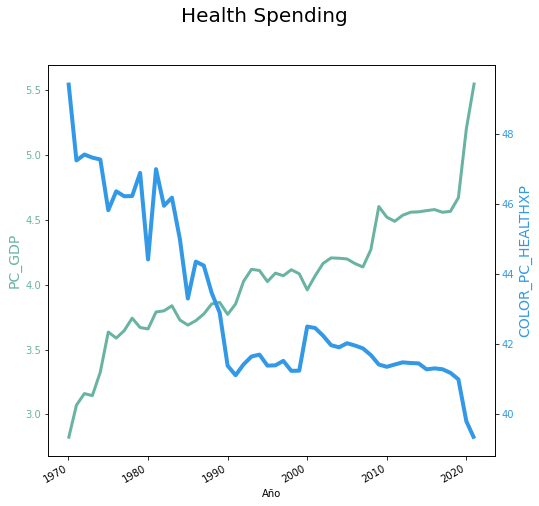

In [42]:


date = df_group['TIME']
PC_GDP = df_group['PC_GDP']
PC_HEALTHXP = df_group['PC_HEALTHXP']
USD_CAP = df_group['USD_CAP']

COLOR_PC_GDP = "#69b3a2"
COLOR_PC_HEALTHXP = "#3399e6"
COLOR_USD_CAP = "#3390e6"


fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()
plt.style.use('fivethirtyeight')

ax1.plot(date, PC_GDP, color=COLOR_PC_GDP, lw=3)
ax2.plot(date, PC_HEALTHXP, color=COLOR_PC_HEALTHXP, lw=4)



ax1.set_xlabel("Año")
ax1.set_ylabel("PC_GDP", color=COLOR_PC_GDP, fontsize=14)
ax1.tick_params(axis="y", labelcolor=COLOR_PC_GDP)

ax2.set_ylabel("COLOR_PC_HEALTHXP", color=COLOR_PC_HEALTHXP, fontsize=14)
ax2.tick_params(axis="y", labelcolor=COLOR_PC_HEALTHXP)

fig.suptitle("Health Spending", fontsize=20)
fig.autofmt_xdate()

date = df_group['TIME']
PC_GDP = df_group['PC_GDP']
PC_HEALTHXP = df_group['PC_HEALTHXP']
USD_CAP = df_group['USD_CAP']


ValueError: x and y must have same first dimension, but have shapes (17732,) and (206,)

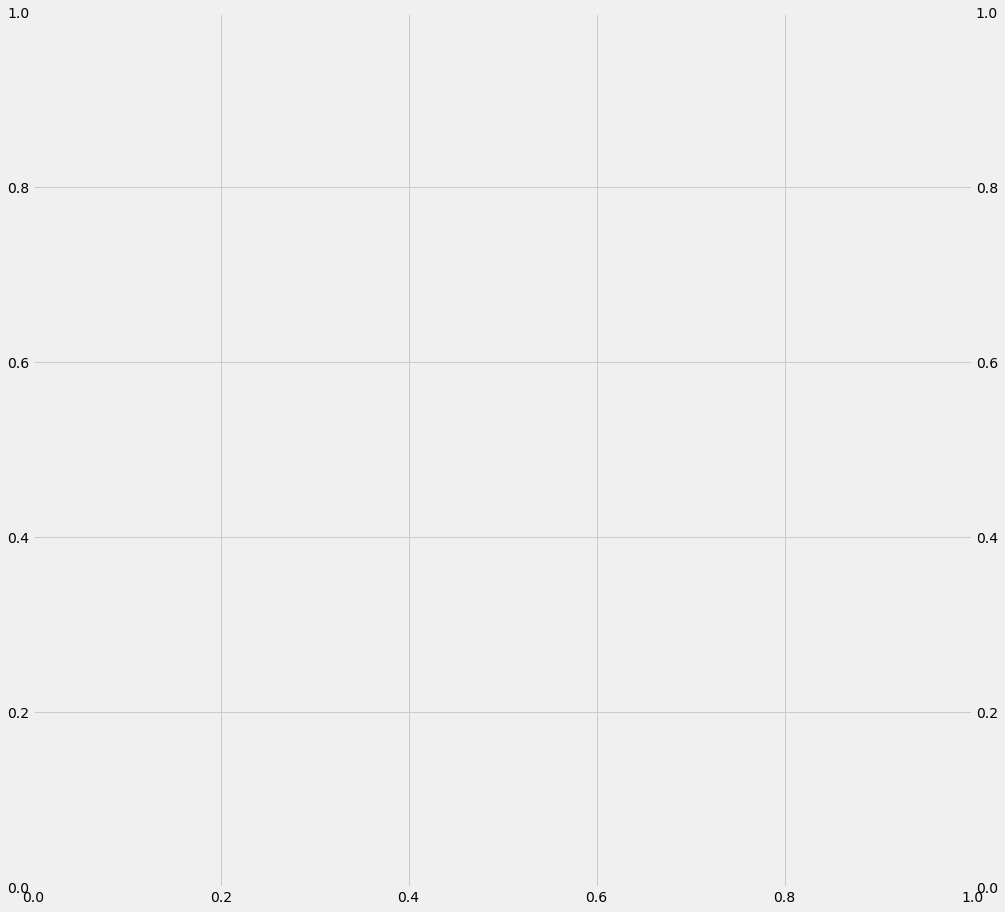

In [77]:
fig, ax1 = plt.subplots(figsize=(15, 15))
ax2 = ax1.twinx()


x = df['TIME']
PC_GDP_USA = df['Value'].loc[(df['LOCATION'] == 'USA') & (df['MEASURE'] == 'PC_GDP')]
PC_GDP_Chile = df['Value'].loc[(df['LOCATION'] == 'USA') & (df['MEASURE'] == 'PC_GDP')]*0.8

with plt.style.context('Solarize_Light2'):
    plt.plot(x, PC_GDP_USA)
    plt.plot(x, PC_GDP_Chile)


    # Number of accent colors in the color scheme
    plt.title('Health Spending', fontsize=20)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Value', fontsize=14)

plt.show()

In [69]:
PC_GDP_Chile = df['Value'].loc[(df['LOCATION'] == 'CHL') & (df['MEASURE'] == 'PC_GDP')]
PC_GDP_Chile

2392     7.035
2393     7.151
2394     7.266
2395     7.333
2396     6.901
         ...  
15321    3.614
15322    3.634
15323    3.677
15324    3.399
15325    3.220
Name: Value, Length: 88, dtype: float64

## 2. Analisis Data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17732 entries, 0 to 17731
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LOCATION    17732 non-null  object 
 1   INDICATOR   17732 non-null  object 
 2   SUBJECT     17732 non-null  object 
 3   MEASURE     17732 non-null  object 
 4   FREQUENCY   17732 non-null  object 
 5   TIME        17732 non-null  int64  
 6   Value       17732 non-null  float64
 7   Flag Codes  2223 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 1.1+ MB


In [10]:
df.describe()

,TIME,Value
count,17732.000000,17732.000000
mean,2001.312881,406.913404
std,13.704854,938.732466
min,1970.000000,0.094000
25%,1992.000000,5.311750
50%,2004.000000,28.282000
75%,2013.000000,327.243250
max,2021.000000,12318.099000


array([[<AxesSubplot:title={'center':'TIME'}>,
        <AxesSubplot:title={'center':'Value'}>]], dtype=object)

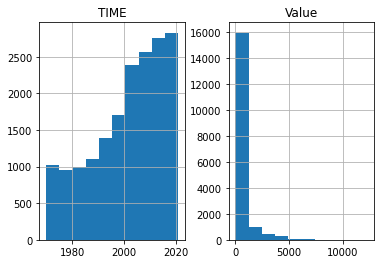

In [9]:
df.hist()